In [1]:
from __future__ import division
from collections import Counter
import matplotlib.pyplot as plt
import math

def dot(v, w):
    """v_1 * w_1 + ... + v_n * w_n"""
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

def sum_of_squares(v):
    """v_1 * v_1 + ... + v_n * v_n"""
    return dot(v, v)

In [2]:
num_friends = [100,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

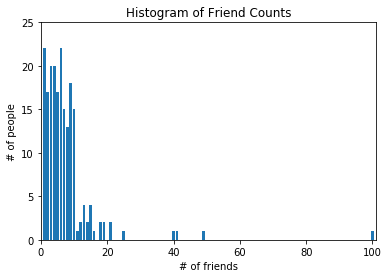

In [3]:
friend_counts = Counter(num_friends)
xs = range(101)
ys = [friend_counts[x] for x in xs]
plt.bar(xs, ys)
plt.axis([0,101,0,25])
plt.title("Histogram of Friend Counts")
plt.xlabel("# of friends")
plt.ylabel("# of people")
plt.show()

In [4]:
num_points = len(num_friends)               

largest_value = max(num_friends)            
smallest_value = min(num_friends)          

sorted_values = sorted(num_friends)
smallest_value = sorted_values[0]           
second_smallest_value = sorted_values[1]   
second_largest_value = sorted_values[-2]      
    
print ("num_points", len(num_friends))
print ("largest value", max(num_friends))
print ("smallest value", min(num_friends))
print ("second_smallest_value", sorted_values[1])
print ("second_largest_value", sorted_values[-2]) 

num_points 204
largest value 100
smallest value 1
second_smallest_value 1
second_largest_value 49


In [5]:
def mean(x): 
    return sum(x) / len(x)

In [6]:
print ("mean(num_friends)", mean(num_friends))

mean(num_friends) 7.333333333333333


In [7]:
def median(v):
    """finds the 'middle-most' value of v"""
    n = len(v)
    sorted_v = sorted(v)
    midpoint = n // 2
    
    if n % 2 == 1:
        # if odd, return the middle value
        return sorted_v[midpoint]
    else:
        # if even, return the average of the middle values
        lo = midpoint - 1
        hi = midpoint
        return (sorted_v[lo] + sorted_v[hi]) / 2

In [8]:
print ("median(num_friends)", median(num_friends))

median(num_friends) 6.0


In [9]:
def quantile(x, p):
    """returns the pth-percentile value in x"""
    p_index = int(p * len(x))
    return sorted(x)[p_index]

In [10]:
print ("quantile(num_friends, 0.10)", quantile(num_friends, 0.10))
print ("quantile(num_friends, 0.25)", quantile(num_friends, 0.25))
print ("quantile(num_friends, 0.75)", quantile(num_friends, 0.75))
print ("quantile(num_friends, 0.90)", quantile(num_friends, 0.90))

quantile(num_friends, 0.10) 1
quantile(num_friends, 0.25) 3
quantile(num_friends, 0.75) 9
quantile(num_friends, 0.90) 13


In [11]:
def mode(x):
    """returns a list, might be more than one mode"""
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.iteritems()
            if count == max_count]

In [12]:
print ("mode(num_friends)", mode(num_friends))

AttributeError: 'Counter' object has no attribute 'iteritems'

In [13]:
# "range" already means something in Python, so we'll use a different name
def data_range(x):
    return max(x) - min(x)

In [14]:
print ("data_range(num_friends)", data_range(num_friends))   

data_range(num_friends) 99


In [15]:
def de_mean(x):
    """translate x by subtracting its mean (so the result has mean 0)"""
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]

In [16]:
def variance(x):
    """assumes x has at least two elements"""
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n - 1)

In [17]:
print ("variance(num_friends)", variance(num_friends))

variance(num_friends) 81.54351395730716


In [18]:
def standard_deviation(x):
    return math.sqrt(variance(x))

In [19]:
print ("standard_deviation(num_friends)", standard_deviation(num_friends))

standard_deviation(num_friends) 9.03014473623248


In [20]:
def interquartile_range(x):
    return quantile(x, 0.75) - quantile(x, 0.25)

In [21]:
print ("interquartile_range(num_friends)", interquartile_range(num_friends))

interquartile_range(num_friends) 6


Correlation

In [22]:
daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]

In [23]:
def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n - 1)

In [24]:
def correlation(x, y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x, y) / stdev_x / stdev_y
    else:
        return 0 # if no variation, correlation is zero

In [25]:
outlier = num_friends.index(100) # index of outlier

num_friends_good = [x 
                    for i, x in enumerate(num_friends) 
                    if i != outlier]

daily_minutes_good = [x 
                      for i, x in enumerate(daily_minutes) 
                      if i != outlier]

In [26]:
print ("covariance(num_friends, daily_minutes)", covariance(num_friends, daily_minutes))
print ("correlation(num_friends, daily_minutes)", correlation(num_friends, daily_minutes))
print ("correlation(num_friends_good, daily_minutes_good)", correlation(num_friends_good, daily_minutes_good))

covariance(num_friends, daily_minutes) 22.425435139573064
correlation(num_friends, daily_minutes) 0.24736957366478218
correlation(num_friends_good, daily_minutes_good) 0.5736792115665573
